In [7]:
using Makie
using CairoMakie
using NCDatasets

In [33]:
goodlon, goodlat

([881, 882, 883, 884, 885, 886, 887, 888, 889, 890  …  1671, 1672, 1673, 1674, 1675, 1676, 1677, 1678, 1679, 1680], [1, 2, 3, 4, 5, 6, 7, 8, 9, 10  …  271, 272, 273, 274, 275, 276, 277, 278, 279, 280])

In [31]:
domain = [-70., 30., -85., -50.]
# domain = [-60., -35., -70., -62.]

datafile = "/home/ctroupin/temperature_surface2.nc"
nc = NCDataset(datafile, "r")
# print(nc)
lon = nc["λ_caa"][:]
lat = nc["φ_aca"][:]
goodlon = findall((lon .<= domain[2]) .& (lon .>= domain[1]) )
goodlat = findall((lat .<= domain[4]) .& (lat .>= domain[3]) )
@info(size(nc["u"][:,:,:,:]))
u2plot = nc["u"][goodlon, goodlat, 1, end]
v2plot = nc["v"][goodlon, goodlat, 1, end]
close(nc)

[ Info: (2880, 400, 1, 6)


closed Dataset

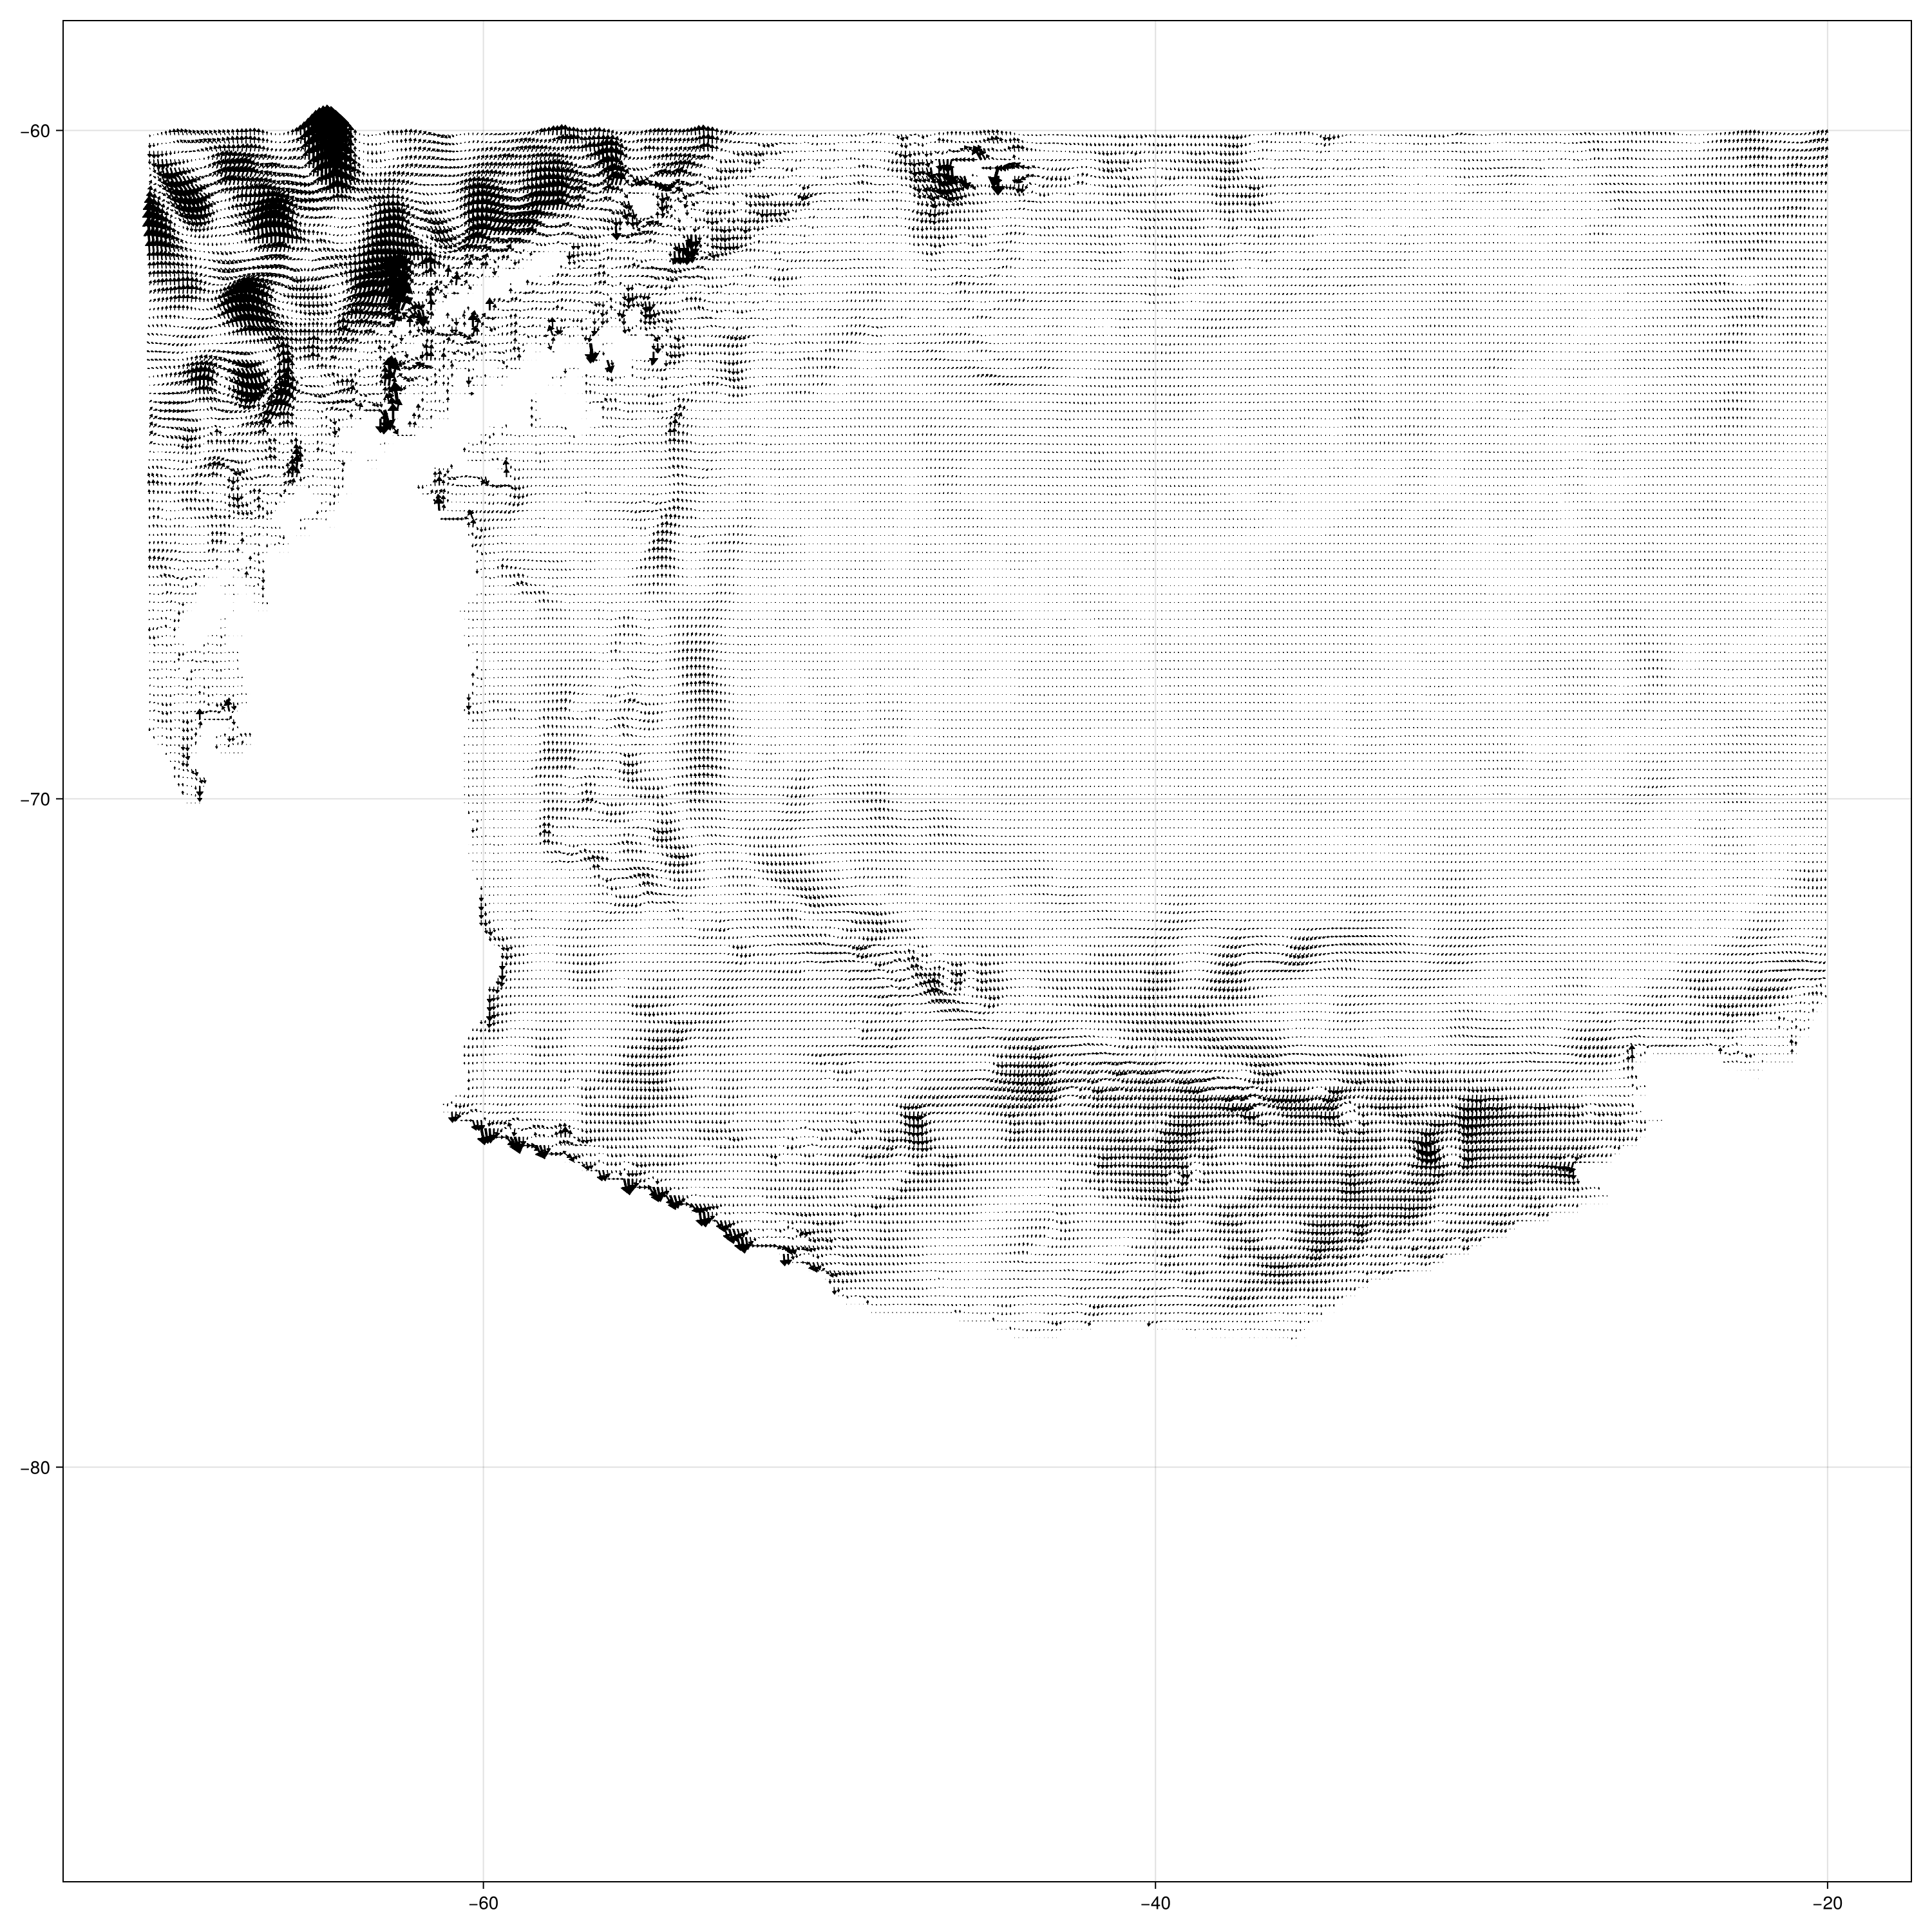

CairoMakie.Screen{IMAGE}


In [30]:
fig = Figure(size=(1500, 1500))
ax = Axis(fig[1,1])
arrows2d!(lon[goodlon], lat[goodlat], u2plot, v2plot)
display(fig)